## 実験概要
DCSGDにおけるノイズの強度について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

ノイズの種類
- 対数正規分布
- 正規分布

ノイズについて
- 平均は０
- 分散
    - 0.1
    - 1
    - 2
    - 5




In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import DC_SGD
from ML2_lib import loss


In [4]:



# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
noise = "normal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

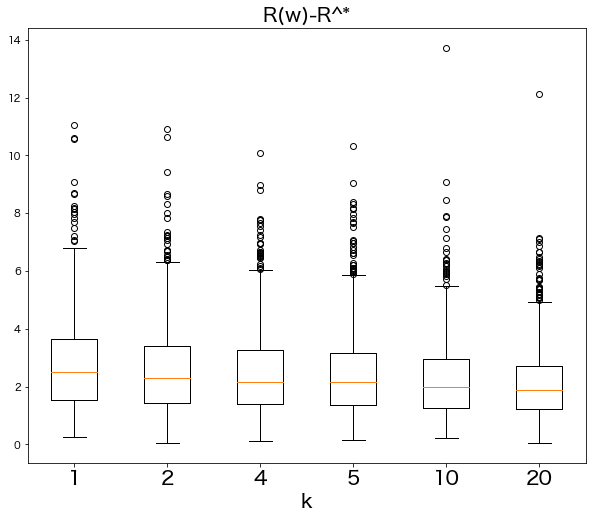

In [7]:
trail_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=1000,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [18]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_normal_trial_num_{trail_num}_E_var{E_var}.csv")